In [1]:
%cd C:\Users\yukir\Documents\GitHub\Text_Mining\py

from nlp_processing import *
from text_preprocessing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\mega_trend

C:\Users\yukir\Documents\GitHub\Text_Mining\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6979566626441678706
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4059721626291211105
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13986639250696008141
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3706495881130394776
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\io\matlab\mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


C:\Users\yukir\Documents\Monicas_workspace\mega_trend


C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib_inline\config.py:75: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


Text(0.5, 1.0, '안녕')

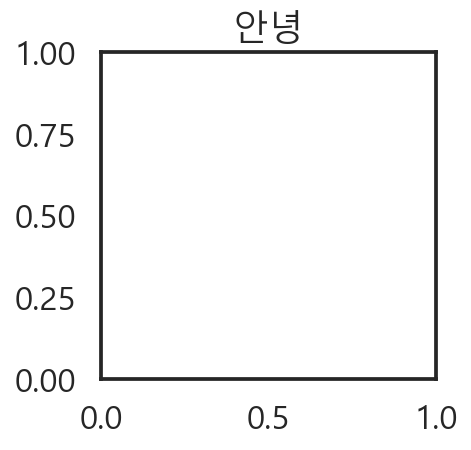

In [2]:
plt.figure(figsize = (3,3))
plt.rc('font', family='Malgun Gothic') 
%config InlineBackend.figure_format = 'retina'
plt.title("안녕")

In [3]:
from nltk.corpus import stopwords  
stopwords.words('korean')[:10] 

stopwords_kor = stopwords.words('korean')

In [4]:
from tqdm import tqdm
import os
import sys

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
def clean_text(text): 
    """ 한글, 영문, 숫자만 남기고 제거한다. 
    :param text: 
    :return: 
    """ 
    text = text.replace(".", " ").strip() 
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+' 
    text = re.sub(pattern=pattern, repl='', string=text) 
    return text 
    
def get_nouns(tokenizer, sentence): 
    """ 단어의 길이가 2이상인 일반명사(NNG),
     고유명사(NNP), 외국어(SL)만을 반환한다. 
     :param tokenizer: 
     :param sentence: :return: """ 
    tagged = tokenizer.nouns(sentence)
    nouns = [s for s in tagged if len(s)>1] 
     
    return nouns 
     
def tokenize(clean_example): 
    tokenizer = okt
    processed_data = [] 
    for sent in tqdm(clean_example):
        sentence = clean_text(sent.replace('\n', '').strip()) 
        processed_data.append(get_nouns(tokenizer, sentence)) 
        
    return processed_data
    
    
def save_processed_data(processed_data): 
    """ 토큰 분리한 데이터를 csv로 저장 :param processed_data: :return: """ 
    
    with open('tokenized.csv', 'w', newline='', encoding='utf-8') as f: 
        writer = csv.writer(f) 
        for data in processed_data:
             writer.writerow(data)

### DATA LOAD

In [7]:
f = open('C:\\Users\\yukir\\Documents\\Monicas_workspace\\mega_trend\\0214_pre.txt')
lines=f.readlines()

clean_example = []

for i in tqdm (lines):
    k = clean_text(i)
    # text = re.sub('\n','',k)
    # print(text)
    k = k.strip()
    k = k.replace('\n','')
    p = re.compile("[^0-9]")
    k = ("".join(p.findall(k)))
    if k==[] or '':
        pass
    elif k=='':
        pass
    elif len(k)<=2:
        pass
    elif '제약' in k:
        clean_example.append(k)
    # else:   
    #     clean_example.append(k)

len(clean_example)

100%|██████████| 1514/1514 [00:00<00:00, 94634.68it/s]


57

In [8]:
## 오래걸리니까 조심
def tokenize(clean_example): 
    tokenizer = okt
    processed_data = [] 
    for sent in tqdm(clean_example):
        sentence = clean_text(sent.replace('\n', '').strip()) 
        processed_data.append(get_nouns(tokenizer, sentence)) 
        
    return processed_data
        
def save_processed_data(processed_data): 
    """ 토큰 분리한 데이터를 csv로 저장 :param processed_data: :return: """ 
    
    with open('211tokenized_TFIDF.csv', 'w', newline='', encoding='utf-8') as f: 
        writer = csv.writer(f) 
        for data in processed_data:
             writer.writerow(data)


from tqdm import tqdm 
if __name__ == '__main__':
     # df = pd.read_csv('negative.csv', index_col = 0)
     processed_data = tokenize(clean_example) # description 부분을 토크나이징 한다. 
     
     # 토큰 분리한 데이터를 저장 
     save_processed_data(processed_data)

100%|██████████| 57/57 [00:03<00:00, 14.80it/s]


### TF_IDF

In [9]:
clean_example[:10]

['제약기술',
 '제약기술 전통적인 화학 화합물소분자 및 분자 클래스의 새로운 반복은 다중 및 동시표적 구조와 같은 의약품으로 사용 가능',
 '제약기술 사례세놀리틱스와 세포 노화 조절  세포 노화는 약물개발이 가능하지 않은 피할 수 없는 생리적 과정으로 간주됨  그러나 세놀리틱스는 세포 염증 기능 장애 및 조직 손상을 유발할 수 있는 노화 세포를 감소시키거나 제거가 가능',
 '제약및바이오테크',
 '제약기술신종희귀질환및항암제 소분자 약물 및 항체 외에도 희귀질환에 대한 다양한 신약 유형이 존재',
 '제약기술 신종희귀질환및항암제 바이러스 벡터기반 치료법은 암 전염병 및 희귀 유전질환 치료법으로 부상',
 '인공지능 많은 바이오 제약 및 의료기술 회사들이 인공지능을 사용해 신약 발견 및 개발 기능을 간소화하고 최적화',
 '인공지능 제약약물 개발 및 임상시험',
 '제약기술 제약발견 등',
 '블록체인  그러나 규제의 불확실성 블록체인 기술의 미래 확장성 제한된 상업화로 인한 증명되지 않은 가치 및 헬스케어 산업의 신기술에 대한 타성 등이 시장 성장의 제약 요인']

In [10]:
processed_data[:10]

[['제약', '기술'],
 ['제약',
  '기술',
  '전통',
  '화학',
  '화합물',
  '분자',
  '분자',
  '클래스',
  '반복',
  '다중',
  '동시',
  '표적',
  '구조',
  '의약품',
  '사용',
  '가능'],
 ['제약',
  '기술',
  '사례',
  '틱스',
  '세포',
  '노화',
  '조절',
  '세포',
  '노화',
  '약물',
  '개발',
  '생리',
  '과정',
  '간주',
  '세놀리틱스',
  '세포',
  '염증',
  '기능',
  '장애',
  '조직',
  '손상',
  '유발',
  '노화',
  '세포',
  '감소',
  '제거',
  '가능'],
 ['바이오', '테크'],
 ['기술', '신종', '희귀질환', '항암제', '분자', '약물', '항체', '희귀질환', '대한', '신약', '유형', '존재'],
 ['제약',
  '기술',
  '신종',
  '희귀질환',
  '항암제',
  '바이러스',
  '벡터',
  '기반',
  '치료법',
  '전염병',
  '희귀',
  '유전',
  '질환',
  '치료법',
  '부상'],
 ['인공',
  '지능',
  '바이오',
  '제약',
  '의료',
  '기술',
  '회사',
  '인공',
  '지능',
  '사용',
  '신약',
  '발견',
  '개발',
  '기능',
  '간소화',
  '최적화'],
 ['인공', '지능', '제약', '약물', '개발', '임상시험'],
 ['제약', '기술', '제약', '발견'],
 ['블록',
  '체인',
  '규제',
  '불확실',
  '블록',
  '체인',
  '기술',
  '미래',
  '확장',
  '제한',
  '상업',
  '화로',
  '증명',
  '가치',
  '스케',
  '산업',
  '기술',
  '대한',
  '타성',
  '시장',
  '성장',
  '제약',
  '요인']]

In [11]:
detokenized_doc = []
for i in range(len(processed_data)):
    t = ' '.join(processed_data[i])
    try: 
        if '인공 지능' in t:
            t = t.replace('인공 지능', '인공')
            detokenized_doc.append(t)
        elif '오믹스 분자 기술' in t:
            t = t.replace('오믹스 분자 기술', '오믹스분자기술')
            detokenized_doc.append(t)
        elif '제약 기술' in t:
            t = t.replace('제약 기술', '제약기술')
            detokenized_doc.append(t)
        else:
            detokenized_doc.append(t)

    except:
        detokenized_doc.append(t)
    

import pandas as pd
df = pd.DataFrame({'detokenized_doc':detokenized_doc})
df = df.dropna()
print(df.shape)
df.head()

(57, 1)


,detokenized_doc
0,제약기술
1,제약기술 전통 화학 화합물 분자 분자 클래스 반복 다중 동시 표적 구조 의약품 사용 가능
2,제약기술 사례 틱스 세포 노화 조절 세포 노화 약물 개발 생리 과정 간주 세놀리틱스...
3,바이오 테크
4,기술 신종 희귀질환 항암제 분자 약물 항체 희귀질환 대한 신약 유형 존재


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word',       
                             min_df=0,                        # minimum reqd occurences of a word 
                             stop_words=stopwords_kor,             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[가-힣0-9]{1,}',  # num chars > 3
                             max_features=2000,             # max number of uniq words
                            ) 
data_vectorized = vectorizer.fit_transform(df['detokenized_doc'])
data_vectorized.shape # TF-IDF 행렬의 크기 확인

(57, 213)

In [13]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  3.9617823902479206 %


In [19]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=3,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=1337,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_top=lda_model.fit_transform(data_vectorized)

print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.77556608 0.74485576 0.4704704  0.4321993  0.45888673 0.92283132
  0.49620727 0.60753677 0.8315347  0.75644858 0.63915057 0.63236489
  0.44227058 0.45933983 0.47023832 0.5578402  0.49997725 0.44893264
  0.49536858 0.81867484 0.61540997 0.63617427 0.46736254 0.66508195
  0.44680863 0.47967387 0.64333232 0.71843403 0.61661995 0.74669083
  0.98502605 0.72406602 0.4804959  1.80762573 0.44695254 0.42201113
  0.44138712 0.84471076 0.4517677  0.48298797 0.44891874 0.47135351
  0.83935493 0.58989444 0.73914513 0.46593442 0.50104197 0.63146212
  0.65202709 0.4298288  0.85166782 0.48301587 0.61797361 0.46066043
  0.69184753 1.02043974 0.45639865 0.4546096  0.45668351 0.6615265
  0.67599421 0.78383395 0.68381795 0.65015969 0.48766451 0.68035128
  0.44515877 0.4669536  0.49178361 0.63109677 0.79166709 0.65148688
  0.72932461 0.58742756 0.46785685 0.58806653 0.46901372 0.64040314
  0.45194778 0.64291028 0.47744238 0.48536774 0.62266464 0.64365
  0.64369799 0.46341784 0.44585192 0.91688975 0.7977

In [20]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
print(lda_model.get_params())

Log Likelihood:  -983.1741313164437
Perplexity:  733.3210113340249
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 3, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1337, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


### OUTPUT

In [21]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(clean_example))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 10), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.177508,0.168885,0.653607,2
Doc1,0.077744,0.840116,0.082141,1
Doc2,0.858498,0.069654,0.071848,0
Doc3,0.583362,0.262214,0.154424,0
Doc4,0.089434,0.094112,0.816454,2
Doc5,0.836628,0.079532,0.083840,0
Doc6,0.082773,0.783671,0.133556,1
Doc7,0.111214,0.128262,0.760524,2
Doc8,0.133243,0.147082,0.719676,2
Doc9,0.846788,0.073702,0.079510,0


In [66]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=30):
    topic_components = []
    for idx, topic in enumerate(components):
        topic_components.append([(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
    return topic_components
topic_components = get_topics(lda_model.components_,terms)

In [76]:
topic_com1 = topic_components[0]
topic_com2 = topic_components[1]
topic_com3 = topic_components[2]

topic_df = pd.DataFrame({'topic_1':topic_com1, 'topic_2':topic_com2, 'topic_3':topic_com3})
topic_df.head()

,topic_1,topic_2,topic_3
0,"(세포, 3.41)","(바이오, 4.59)","(제약기술, 4.08)"
1,"(치료, 2.07)","(제약, 3.99)","(제약, 1.92)"
2,"(노화, 1.81)","(서비스, 2.75)","(기술, 1.87)"
3,"(제약기술, 1.68)","(의약품, 2.44)","(혁신, 1.85)"
4,"(치료법, 1.3)","(실험실, 2.0)","(임상시험, 1.75)"


In [69]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
1     -1015.700562  1338.981201       1        1  34.938243
2      -387.996002  -373.316162       2        1  33.804459
0     -2184.745605   -60.565800       3        1  31.257299, topic_info=     Term      Freq     Total Category  logprob  loglift
89     세포  1.000000  1.000000  Default  30.0000  30.0000
55    바이오  2.000000  2.000000  Default  29.0000  29.0000
142  제약기술  2.000000  2.000000  Default  28.0000  28.0000
120   의약품  1.000000  1.000000  Default  27.0000  27.0000
85    서비스  1.000000  1.000000  Default  26.0000  26.0000
..    ...       ...       ...      ...      ...      ...
142  제약기술  0.577939  2.305232   Topic3  -4.3895  -0.2206
37     대면  0.290175  0.735650   Topic3  -5.0784   0.2326
126  임상시험  0.323517  1.219103   Topic3  -4.9697  -0.1637
55    바이오  0.350541  2.490190   Topic3  -4.8894  -0.7977
141    제약  0.324455  2.489616   Topic3  -4.9668  -0.8748

[144 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
9         1  0.792786    개발
31        2  0.875652    기술
33        3  1.025386    노화
40        2  1.183596   디지털
55        1  0.803152   바이오
85        1  0.655577   서비스
89        3  0.659553    세포
103       1  0.899952   실험실
120       1  0.812740   의약품
126       2  0.820275  임상시험
141       1  0.401668    제약
141       2  0.401668    제약
142       2  0.433796  제약기술
142       3  0.433796  제약기술
160       1  0.945963    진단
178       3  0.787369    치료
199       2  0.795012    혁신, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [26]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2,21
1,1,21
2,0,15


In [70]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

,가격,가능,가능성,가상,가속,가치,간소화,간주,감소,개발,개발도상국가,거나,거래,결과,결정,결합,결합체,경쟁,고급,고형,공격,과정,과학,교체,구조,국제,규정,규제,기금,기능,기반,기술,기존,노화,다양,다중,단계,대면,독점,동시,디지털,리베이트,메디케이드,면역,면역학,명성,모든,모색,목적,물류,...,집중,차세대,창의,처방,체계,체인,체험,초기,초점,촉진,최근,최소,최적화,추구,추세,치료,치료법,클래스,타겟,타성,테마,테크,통신,통합,통해,투자,투자가,틱스,파괴,표적,프로그래밍,항암제,항원,항체,행정부,헬스,혁신,호조,화가,화로,화학,화합물,확대,확장,환자,회복,회사,후보,희귀,희귀질환
Topic0,0.775566,0.744856,0.470470,0.432199,0.458887,0.922831,0.496207,0.607537,0.831535,0.756449,0.639151,0.632365,0.442271,0.459340,0.470238,0.557840,0.499977,0.448933,0.495369,0.818675,0.615410,0.636174,0.467363,0.665082,0.446809,0.479674,0.643332,0.718434,0.616620,0.746691,0.985026,0.724066,0.480496,1.807626,0.446953,0.422011,0.441387,0.844711,0.451768,0.482988,0.448919,0.471354,0.839355,0.589894,0.739145,0.465934,0.501042,0.631462,0.652027,0.429829,...,0.706628,0.492232,0.452770,0.505039,0.467212,0.779161,0.472419,0.460631,0.432200,0.770523,0.722511,0.696073,0.461728,0.464892,0.454466,2.073486,1.304151,0.445164,0.493993,0.636510,0.468803,1.155336,0.494508,0.472827,0.438124,0.667525,0.467664,0.647996,0.626430,0.469409,0.599211,0.660996,0.629556,0.475341,0.462744,0.430549,0.571945,0.462228,0.444357,0.644275,0.450453,0.447416,0.633581,0.588992,0.757273,0.487332,0.455348,0.844733,0.665666,0.599825
Topic1,0.764068,0.821401,0.542657,1.227480,0.474566,0.416672,0.751420,0.476883,0.448171,1.635155,0.482548,0.467784,0.486161,0.455883,0.726519,0.440572,0.436910,0.435322,0.463743,0.452359,0.457913,0.441193,0.738433,0.475822,0.906148,0.803335,0.505824,0.487516,0.438427,0.678416,0.484243,0.599848,0.672222,0.461542,0.535839,0.852967,1.137342,0.477798,0.840087,0.882058,0.469056,0.957125,0.472216,0.463726,0.456727,0.442379,0.430665,0.484461,0.459553,0.474450,...,0.456716,0.479001,1.021469,1.328846,0.452050,0.466398,0.746626,1.173307,0.896977,0.479162,0.503498,0.443470,0.676897,0.477688,0.492424,1.055857,0.503663,0.880193,0.473863,0.501514,0.471467,0.520446,0.483815,0.478754,0.647799,0.493899,0.806051,0.451961,0.457790,0.877937,0.497383,0.468730,0.456417,0.454311,0.461841,0.735203,1.071401,0.550721,0.570969,0.483918,0.878467,0.882128,0.450528,0.459918,0.468814,0.474231,0.977004,0.461702,0.458698,0.770652
Topic2,0.468723,0.486318,0.541556,0.533464,1.372052,0.569729,0.420354,0.449421,0.478380,1.105012,0.451631,0.462891,0.786885,0.759315,0.492195,0.434696,0.804885,0.789479,0.793098,0.430034,0.453382,0.488121,0.453554,0.479482,0.459993,0.463716,0.460783,0.872160,0.475267,0.525649,0.467870,1.870702,0.473354,0.511405,0.552960,0.472218,0.737347,0.748741,0.480045,0.476821,1.440983,0.508274,0.457148,0.498586,0.452014,1.039878,0.938818,0.695261,0.443898,1.052251,...,0.478537,0.768270,0.433421,0.536792,0.811610,0.452692,0.491484,0.479384,0.452370,0.437443,0.457841,0.458198,0.743993,0.993637,0.789859,0.465718,0.442617,0.471687,0.769402,0.476566,0.796912,0.516084,0.997978,0.996838,0.745202,0.907649,0.798500,0.482434,0.462202,0.436173,0.471569,0.693787,0.494177,1.016035,0.673515,0.472788,1.852961,0.554043,0.535803,0.449322,0.467990,0.442287,0.479660,0.479658,0.692274,0.945786,0.708460,0.424748,0.469565,0.885928


In [75]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)    ### 이걸로 보는게 더 깔끔    

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,세포,치료,노화,제약기술,치료법,테크,종양,바이오,재생의학,기반,업체,유전자,조직,제약,손상
Topic 1,바이오,제약,서비스,의약품,실험실,진단,개발,처방,가상,분자,초기,의료,단계,혁신,치료
Topic 2,제약기술,제약,기술,혁신,임상시험,디지털,약물,가속,바이오,전환,발견,전망,인공,예상,개발
